In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt

In [2]:
rawplant = pd.read_csv('../slcapstone/data/plantInfo-raw (1).csv')
rawplant

,Name,sowInstructions,spaceInstructions,harvestInstructions,compatiblePlants,avoidInstructions,culinaryHints,culinaryPreservation,image,url
0,"Amaranth, also Love-lies-bleeding",Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,Harvest in 7-8 weeks.,"Compatible with (can grow beside): Onions, cor...",NaN,Both leaves and seeds can be used. Excessive i...,NaN,http://gardenate.com/image/1/thumb/150/150,http://gardenate.com/plant/Amaranth
1,"Beans - dwarf, also French beans, Bush beans",Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,Harvest in 7-10 weeks. Pick often to encourage...,"Compatible with (can grow beside): Sweetcorn, ...","Avoid growing close to: Alliums (Chives, leek,...","Can be used in salads when young, blanched and...",Will freeze well.,http://gardenate.com/image/43/thumb/150/150; h...,http://gardenate.com/plant/Beans%2B-%2Bdwarf
2,"Sweet corn, also maize",Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,Harvest in 11-14 weeks.,"Compatible with (can grow beside): All beans, ...",Avoid growing close to: Celery.,Piick and cook within an hour. Remove the silk...,NaN,http://gardenate.com/image/40/thumb/150/150; h...,http://gardenate.com/plant/Sweet%2Bcorn
3,"Cowpeas, also Black eye peas, Southern peas",Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,Harvest in 11-14 weeks.,NaN,NaN,Young leaves can be cooked and used like spina...,NaN,NaN,http://gardenate.com/plant/Cowpeas
4,"Corn Salad, also Lamb's lettuce or Mache",Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,Harvest in 5-8 weeks.,Compatible with (can grow beside): Onions,NaN,Pick individual leaves or harvest the whole pl...,NaN,http://gardenate.com/image/130/thumb/150/150,http://gardenate.com/plant/Corn%2BSalad
...,...,...,...,...,...,...,...,...,...,...
89,"Rosella, also Queensland Jam Plant, Roselle","Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,Harvest in 21-25 weeks.,"Compatible with (can grow beside): Feverfew, C...",NaN,The large flowers produce a crimson enlarged c...,NaN,http://gardenate.com/image/108/thumb/150/150,http://gardenate.com/plant/Rosella
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,Harvest in approximately 1 years. In warmer ar...,"Compatible with (can grow beside): Beans, Carr...",Avoid growing close to: Potatoes,"Leaves sprinkled on roast potatoes, meat and b...",NaN,http://gardenate.com/image/44/thumb/150/150,http://gardenate.com/plant/Rosemary
91,"Rutabaga, also Swedes",Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,Harvest in 10-14 weeks.,"Compatible with (can grow beside): Peas, Beans...",Avoid growing close to: Potatoes,Use when about the size of a tennis ball. The ...,NaN,NaN,http://gardenate.com/plant/Rutabaga
92,"Salsify, also Vegetable oyster",Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,Harvest in 14-21 weeks.,"Compatible with (can grow beside): Beans, Bras...",NaN,Wash and scrape the roots then boil before fry...,NaN,http://gardenate.com/image/142/thumb/150/150,http://gardenate.com/plant/Salsify


In [3]:
people = pd.read_csv('../slcapstone/data/Philpott_etal_GLMMGardenerPlant_dryad.csv')
people

,Survey,Garden,Age,Gender,Region,Education,Years,Hours,LNHours,Motivation,PlantSpp,CropSpp,OrnamSpp,LNPlantSpp,LNCropSpp,LNOrnamSpp,PropCrop
0,103,1,61,Female,NorthAmerica,University,15.0,1.0,0.000000,Environment,10,8,2,2.397895,2.197225,1.098612,0.800000
1,108,1,75,Female,NorthAmerica,University,50.0,3.0,1.098612,Environment,12,10,2,2.564949,2.397895,1.098612,0.833333
2,107,1,78,Female,NorthAmerica,PostHighSchool,60.0,5.0,1.609438,Environment,14,10,4,2.708050,2.397895,1.609438,0.714286
3,105,1,78,Female,NorthAmerica,GraduateDeg,45.0,3.0,1.098612,Food,11,10,1,2.484907,2.397895,0.693147,0.909091
4,63,1,53,Male,NorthAmerica,GraduateDeg,4.0,5.0,1.609438,Food,12,11,1,2.564949,2.484907,0.693147,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,100,18,50,Female,NorthAmerica,University,45.0,2.0,0.693147,Recreation,28,22,6,3.367296,3.135494,1.945910,0.785714
162,12,18,39,Male,NorthAmerica,PostHighSchool,18.0,3.0,1.098612,Recreation,11,9,2,2.484907,2.302585,1.098612,0.818182
163,93,18,37,Female,LatinAmerica,PostHighSchool,25.0,7.0,1.945910,Recreation,17,11,6,2.890372,2.484907,1.945910,0.647059
164,102,18,53,Female,NorthAmerica,GraduateDeg,10.0,16.0,2.772589,Recreation,14,12,2,2.708050,2.564949,1.098612,0.857143


In [45]:
people['Years'] = people['Years'].astype('int')

In [4]:
female = people.loc[people['Gender'] == 'Female']
femalcol = ['Gender','Motivation']
femalemotiv = female[femalcol]
femalemotiv

,Gender,Motivation
0,Female,Environment
1,Female,Environment
2,Female,Environment
3,Female,Food
6,Female,Recreation
...,...,...
157,Female,Food
159,Female,Food
161,Female,Recreation
163,Female,Recreation


In [5]:
femalemotiv = femalemotiv.Motivation.value_counts().to_frame()

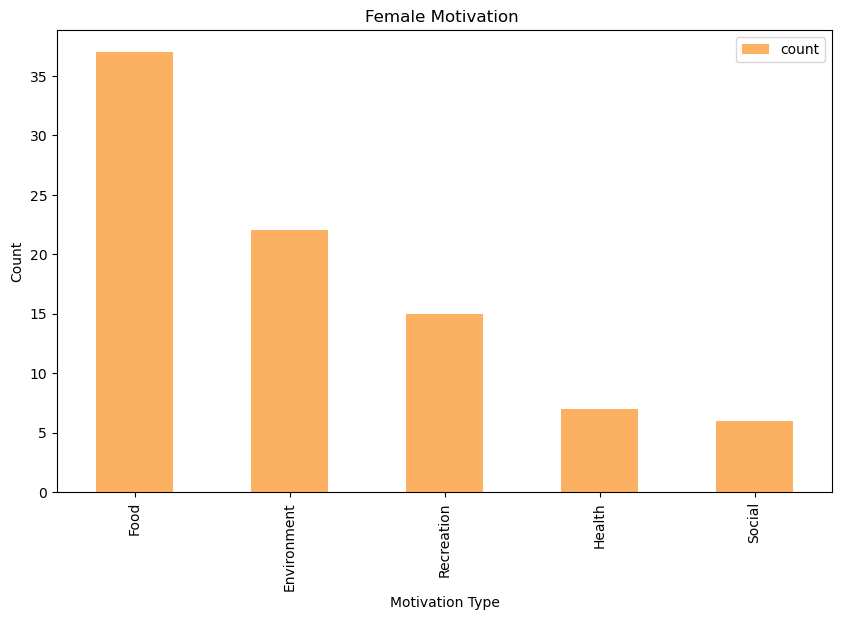

In [6]:
femalemotiv.plot(kind='bar', figsize=(10, 6), color=['#fbb161'])
plt.title('Female Motivation ')
plt.xlabel('Motivation Type')
plt.ylabel('Count')
plt.show()

In [7]:
male = people.loc[people['Gender'] == 'Male']
malecol = ['Gender','Motivation']
malemotiv = male[malecol]
malemotiv

,Gender,Motivation
4,Male,Food
5,Male,Health
8,Male,Recreation
9,Male,Environment
10,Male,Food
...,...,...
155,Male,Social
158,Male,Food
160,Male,Food
162,Male,Recreation


In [8]:
malemotiv = malemotiv.Motivation.value_counts().to_frame()

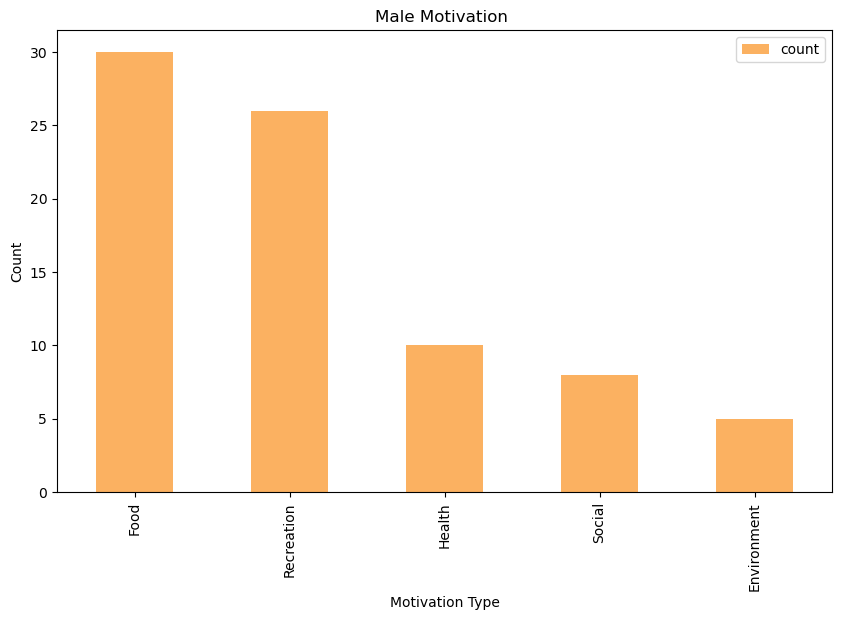

In [78]:
malemotiv.plot(kind='bar', figsize=(10, 6), color=['#fbb161'])
plt.title('Male Motivation ')
plt.xlabel('Motivation Type')
plt.ylabel('Count')
plt.show()

In [10]:
URL = 'https://gardeningmentor.com/how-much-do-vegetable-seeds-cost/'
response = requests.get(URL)

In [11]:
response.status_code

200

In [12]:
soup = BS(response.text)

In [13]:
soup.findAll('table')

[<table><tbody><tr><td><strong>Plant</strong></td><td><strong>Price per 50 seeds</strong></td></tr><tr><td>Arugula</td><td>$0.69</td></tr><tr><td><a href="https://gardeningmentor.com/can-you-grow-asparagus-in-a-pot/">Asparagus</a></td><td>$4.38</td></tr><tr><td><a href="https://gardeningmentor.com/how-to-grow-black-beans-in-a-container/">Beans</a></td><td>$3.75</td></tr><tr><td><a href="https://gardeningmentor.com/growing-beets/">Beets</a></td><td>$0.55</td></tr><tr><td><a href="https://gardeningmentor.com/how-to-grow-bok-choy-in-a-pot/" title="How To Grow Bok Choy In A Pot">Bok Choy</a></td><td>$0.69</td></tr><tr><td>Broccoli</td><td>$0.46</td></tr><tr><td><a href="https://gardeningmentor.com/how-to-grow-brussel-sprouts-in-pots/">Brussels Sprouts</a></td><td>$2.75</td></tr><tr><td><a href="https://gardeningmentor.com/can-you-grow-cabbage-in-a-pot/">Cabbage</a></td><td>$0.42</td></tr><tr><td><a href="https://gardeningmentor.com/how-to-grow-carrots/">Carrots</a></td><td>$0.19</td></tr><

In [14]:
table_html = str(soup.find('table'))

from IPython.core.display import HTML

HTML(table_html)

Plant,Price per 50 seeds
Arugula,$0.69
Asparagus,$4.38
Beans,$3.75
Beets,$0.55
Bok Choy,$0.69
Broccoli,$0.46
Brussels Sprouts,$2.75
Cabbage,$0.42
Carrots,$0.19
Cauliflower,$0.75


In [15]:
cost = pd.read_html(str(soup.find('table')))[0]
cost

,0,1
0,Plant,Price per 50 seeds
1,Arugula,$0.69
2,Asparagus,$4.38
3,Beans,$3.75
4,Beets,$0.55
...,...,...
65,Pineapple,$2.50
66,Cantaloupe,$24.95
67,Watermelon,$4.99
68,Currants,$2.00


In [16]:
cost = cost.rename(columns = {0:'plants', 1:'price'})
cost

,plants,price
0,Plant,Price per 50 seeds
1,Arugula,$0.69
2,Asparagus,$4.38
3,Beans,$3.75
4,Beets,$0.55
...,...,...
65,Pineapple,$2.50
66,Cantaloupe,$24.95
67,Watermelon,$4.99
68,Currants,$2.00


In [17]:
rawplant['Name'] = rawplant['Name'].str.split(',', expand = True)[0]
rawplant['Name'] = rawplant['Name'].str.split('-', expand = True)[0]
rawplant

,Name,sowInstructions,spaceInstructions,harvestInstructions,compatiblePlants,avoidInstructions,culinaryHints,culinaryPreservation,image,url
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,Harvest in 7-8 weeks.,"Compatible with (can grow beside): Onions, cor...",NaN,Both leaves and seeds can be used. Excessive i...,NaN,http://gardenate.com/image/1/thumb/150/150,http://gardenate.com/plant/Amaranth
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,Harvest in 7-10 weeks. Pick often to encourage...,"Compatible with (can grow beside): Sweetcorn, ...","Avoid growing close to: Alliums (Chives, leek,...","Can be used in salads when young, blanched and...",Will freeze well.,http://gardenate.com/image/43/thumb/150/150; h...,http://gardenate.com/plant/Beans%2B-%2Bdwarf
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,Harvest in 11-14 weeks.,"Compatible with (can grow beside): All beans, ...",Avoid growing close to: Celery.,Piick and cook within an hour. Remove the silk...,NaN,http://gardenate.com/image/40/thumb/150/150; h...,http://gardenate.com/plant/Sweet%2Bcorn
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,Harvest in 11-14 weeks.,NaN,NaN,Young leaves can be cooked and used like spina...,NaN,NaN,http://gardenate.com/plant/Cowpeas
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,Harvest in 5-8 weeks.,Compatible with (can grow beside): Onions,NaN,Pick individual leaves or harvest the whole pl...,NaN,http://gardenate.com/image/130/thumb/150/150,http://gardenate.com/plant/Corn%2BSalad
...,...,...,...,...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,Harvest in 21-25 weeks.,"Compatible with (can grow beside): Feverfew, C...",NaN,The large flowers produce a crimson enlarged c...,NaN,http://gardenate.com/image/108/thumb/150/150,http://gardenate.com/plant/Rosella
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,Harvest in approximately 1 years. In warmer ar...,"Compatible with (can grow beside): Beans, Carr...",Avoid growing close to: Potatoes,"Leaves sprinkled on roast potatoes, meat and b...",NaN,http://gardenate.com/image/44/thumb/150/150,http://gardenate.com/plant/Rosemary
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,Harvest in 10-14 weeks.,"Compatible with (can grow beside): Peas, Beans...",Avoid growing close to: Potatoes,Use when about the size of a tennis ball. The ...,NaN,NaN,http://gardenate.com/plant/Rutabaga
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,Harvest in 14-21 weeks.,"Compatible with (can grow beside): Beans, Bras...",NaN,Wash and scrape the roots then boil before fry...,NaN,http://gardenate.com/image/142/thumb/150/150,http://gardenate.com/plant/Salsify


In [18]:
rawplant.drop(columns =['culinaryHints','culinaryPreservation', 'url'])

,Name,sowInstructions,spaceInstructions,harvestInstructions,compatiblePlants,avoidInstructions
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,Harvest in 7-8 weeks.,"Compatible with (can grow beside): Onions, cor...",NaN
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,Harvest in 7-10 weeks. Pick often to encourage...,"Compatible with (can grow beside): Sweetcorn, ...","Avoid growing close to: Alliums (Chives, leek,..."
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,Harvest in 11-14 weeks.,"Compatible with (can grow beside): All beans, ...",Avoid growing close to: Celery.
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,Harvest in 11-14 weeks.,NaN,NaN
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,Harvest in 5-8 weeks.,Compatible with (can grow beside): Onions,NaN
...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,Harvest in 21-25 weeks.,"Compatible with (can grow beside): Feverfew, C...",NaN
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,Harvest in approximately 1 years. In warmer ar...,"Compatible with (can grow beside): Beans, Carr...",Avoid growing close to: Potatoes
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,Harvest in 10-14 weeks.,"Compatible with (can grow beside): Peas, Beans...",Avoid growing close to: Potatoes
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,Harvest in 14-21 weeks.,"Compatible with (can grow beside): Beans, Bras...",NaN


In [19]:
rawplant['growthType'] = rawplant['sowInstructions'].apply(lambda x: 'Easy to grow' if 'Easy to grow' in x else 'Other')
rawplant.to_csv('rawplant.csv', index = False)
rawplant

,Name,sowInstructions,spaceInstructions,harvestInstructions,compatiblePlants,avoidInstructions,culinaryHints,culinaryPreservation,image,url,growthType
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,Harvest in 7-8 weeks.,"Compatible with (can grow beside): Onions, cor...",NaN,Both leaves and seeds can be used. Excessive i...,NaN,http://gardenate.com/image/1/thumb/150/150,http://gardenate.com/plant/Amaranth,Other
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,Harvest in 7-10 weeks. Pick often to encourage...,"Compatible with (can grow beside): Sweetcorn, ...","Avoid growing close to: Alliums (Chives, leek,...","Can be used in salads when young, blanched and...",Will freeze well.,http://gardenate.com/image/43/thumb/150/150; h...,http://gardenate.com/plant/Beans%2B-%2Bdwarf,Easy to grow
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,Harvest in 11-14 weeks.,"Compatible with (can grow beside): All beans, ...",Avoid growing close to: Celery.,Piick and cook within an hour. Remove the silk...,NaN,http://gardenate.com/image/40/thumb/150/150; h...,http://gardenate.com/plant/Sweet%2Bcorn,Other
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,Harvest in 11-14 weeks.,NaN,NaN,Young leaves can be cooked and used like spina...,NaN,NaN,http://gardenate.com/plant/Cowpeas,Easy to grow
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,Harvest in 5-8 weeks.,Compatible with (can grow beside): Onions,NaN,Pick individual leaves or harvest the whole pl...,NaN,http://gardenate.com/image/130/thumb/150/150,http://gardenate.com/plant/Corn%2BSalad,Easy to grow
...,...,...,...,...,...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,Harvest in 21-25 weeks.,"Compatible with (can grow beside): Feverfew, C...",NaN,The large flowers produce a crimson enlarged c...,NaN,http://gardenate.com/image/108/thumb/150/150,http://gardenate.com/plant/Rosella,Other
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,Harvest in approximately 1 years. In warmer ar...,"Compatible with (can grow beside): Beans, Carr...",Avoid growing close to: Potatoes,"Leaves sprinkled on roast potatoes, meat and b...",NaN,http://gardenate.com/image/44/thumb/150/150,http://gardenate.com/plant/Rosemary,Easy to grow
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,Harvest in 10-14 weeks.,"Compatible with (can grow beside): Peas, Beans...",Avoid growing close to: Potatoes,Use when about the size of a tennis ball. The ...,NaN,NaN,http://gardenate.com/plant/Rutabaga,Easy to grow
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,Harvest in 14-21 weeks.,"Compatible with (can grow beside): Beans, Bras...",NaN,Wash and scrape the roots then boil before fry...,NaN,http://gardenate.com/image/142/thumb/150/150,http://gardenate.com/plant/Salsify,Easy to grow


In [20]:
easytogrow = rawplant[rawplant['sowInstructions'].str.contains('Easy to grow', na=False)]
easytogrow

,Name,sowInstructions,spaceInstructions,harvestInstructions,compatiblePlants,avoidInstructions,culinaryHints,culinaryPreservation,image,url,growthType
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,Harvest in 7-10 weeks. Pick often to encourage...,"Compatible with (can grow beside): Sweetcorn, ...","Avoid growing close to: Alliums (Chives, leek,...","Can be used in salads when young, blanched and...",Will freeze well.,http://gardenate.com/image/43/thumb/150/150; h...,http://gardenate.com/plant/Beans%2B-%2Bdwarf,Easy to grow
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,Harvest in 11-14 weeks.,NaN,NaN,Young leaves can be cooked and used like spina...,NaN,NaN,http://gardenate.com/plant/Cowpeas,Easy to grow
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,Harvest in 5-8 weeks.,Compatible with (can grow beside): Onions,NaN,Pick individual leaves or harvest the whole pl...,NaN,http://gardenate.com/image/130/thumb/150/150,http://gardenate.com/plant/Corn%2BSalad,Easy to grow
5,Chives,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 inches apart,Harvest in 7-11 weeks.,"Compatible with (can grow beside): Carrots, To...",NaN,Use raw in salads or as a mild onion flavour i...,NaN,http://gardenate.com/image/69/thumb/150/150,http://gardenate.com/plant/Chives,Easy to grow
6,Coriander,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: Thin to 18 inches,Harvest in 30-45 days.,"Compatible with (can grow beside): Dill, Cherv...",Avoid growing close to: Fennel,Use the leaves to flavour hot meals or add fre...,The seeds can be dried and ground up for curries.,http://gardenate.com/image/52/thumb/150/150,http://gardenate.com/plant/Coriander,Easy to grow
7,Collards,"Easy to grow. Grow in seed trays, and plant ou...",Space plants: 16 - 20 inches apart,Harvest in 8-11 weeks.,Compatible with (can grow beside): Dwarf (bush...,"Avoid growing close to: Climbing (pole) beans,...",Slice and steam or use in stir-fry,NaN,http://gardenate.com/image/147/thumb/150/150,http://gardenate.com/plant/Collards,Easy to grow
8,Choko/Chayote,Easy to grow. Plant whole mature fruit when on...,Space plants: 39 inches apart,Harvest in approximately 17 weeks. Best when f...,Compatible with (can grow beside): Cucumbers,NaN,Chokos can be peeled and chopped to use in ste...,NaN,http://gardenate.com/image/99/thumb/150/150,http://gardenate.com/plant/Choko~Chayote,Easy to grow
9,Burdock,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 24 inches apart,Harvest in 17-18 weeks.,Compatible with (can grow beside): Best grown ...,NaN,Harvest in the first year when the burdock roo...,NaN,NaN,http://gardenate.com/plant/Burdock,Easy to grow
10,Chinese cabbage,Easy to grow. Sow direct in the garden. Sow se...,Space plants: 12 inches apart,Harvest in 8-10 weeks. Harvest whole head or y...,Compatible with (can grow beside): Dwarf (bush...,"Avoid growing close to: Climbing (pole) beans,...",Use in stir-fry . Has a milder flavour than re...,NaN,NaN,http://gardenate.com/plant/Chinese%2Bcabbage,Easy to grow
12,Cabbage,"Easy to grow. Grow in seed trays, and plant ou...",Space plants: 20 - 30 inches apart,Harvest in 11-15 weeks.,Compatible with (can grow beside): Dwarf (bush...,"Avoid growing close to: Climbing (pole) beans,...",Young spring cabbage can be chopped and added ...,NaN,http://gardenate.com/image/71/thumb/150/150,http://gardenate.com/plant/Cabbage,Easy to grow


In [21]:
import re


def extract_format(text):
    match = re.search(r'(\d+\s*(?:-\s*\d+)?\s*(weeks|months|years)?)', text)
    if match:
        return match.group(0)
    else:
        return None


rawplant['harvestInstructions'] = rawplant['harvestInstructions'].apply(extract_format)
rawplant

,Name,sowInstructions,spaceInstructions,harvestInstructions,compatiblePlants,avoidInstructions,culinaryHints,culinaryPreservation,image,url,growthType
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,7-8 weeks,"Compatible with (can grow beside): Onions, cor...",NaN,Both leaves and seeds can be used. Excessive i...,NaN,http://gardenate.com/image/1/thumb/150/150,http://gardenate.com/plant/Amaranth,Other
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,7-10 weeks,"Compatible with (can grow beside): Sweetcorn, ...","Avoid growing close to: Alliums (Chives, leek,...","Can be used in salads when young, blanched and...",Will freeze well.,http://gardenate.com/image/43/thumb/150/150; h...,http://gardenate.com/plant/Beans%2B-%2Bdwarf,Easy to grow
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,11-14 weeks,"Compatible with (can grow beside): All beans, ...",Avoid growing close to: Celery.,Piick and cook within an hour. Remove the silk...,NaN,http://gardenate.com/image/40/thumb/150/150; h...,http://gardenate.com/plant/Sweet%2Bcorn,Other
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,11-14 weeks,NaN,NaN,Young leaves can be cooked and used like spina...,NaN,NaN,http://gardenate.com/plant/Cowpeas,Easy to grow
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,5-8 weeks,Compatible with (can grow beside): Onions,NaN,Pick individual leaves or harvest the whole pl...,NaN,http://gardenate.com/image/130/thumb/150/150,http://gardenate.com/plant/Corn%2BSalad,Easy to grow
...,...,...,...,...,...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,21-25 weeks,"Compatible with (can grow beside): Feverfew, C...",NaN,The large flowers produce a crimson enlarged c...,NaN,http://gardenate.com/image/108/thumb/150/150,http://gardenate.com/plant/Rosella,Other
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,"Compatible with (can grow beside): Beans, Carr...",Avoid growing close to: Potatoes,"Leaves sprinkled on roast potatoes, meat and b...",NaN,http://gardenate.com/image/44/thumb/150/150,http://gardenate.com/plant/Rosemary,Easy to grow
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,10-14 weeks,"Compatible with (can grow beside): Peas, Beans...",Avoid growing close to: Potatoes,Use when about the size of a tennis ball. The ...,NaN,NaN,http://gardenate.com/plant/Rutabaga,Easy to grow
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,14-21 weeks,"Compatible with (can grow beside): Beans, Bras...",NaN,Wash and scrape the roots then boil before fry...,NaN,http://gardenate.com/image/142/thumb/150/150,http://gardenate.com/plant/Salsify,Easy to grow


In [22]:
raw = ['Name', 'sowInstructions', 'spaceInstructions', 'harvestInstructions', 'growthType', 'compatiblePlants']
rawplant2 = rawplant[raw]
rawplant2

,Name,sowInstructions,spaceInstructions,harvestInstructions,growthType,compatiblePlants
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,7-8 weeks,Other,"Compatible with (can grow beside): Onions, cor..."
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,7-10 weeks,Easy to grow,"Compatible with (can grow beside): Sweetcorn, ..."
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,11-14 weeks,Other,"Compatible with (can grow beside): All beans, ..."
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,11-14 weeks,Easy to grow,NaN
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,5-8 weeks,Easy to grow,Compatible with (can grow beside): Onions
...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,21-25 weeks,Other,"Compatible with (can grow beside): Feverfew, C..."
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Easy to grow,"Compatible with (can grow beside): Beans, Carr..."
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,10-14 weeks,Easy to grow,"Compatible with (can grow beside): Peas, Beans..."
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,14-21 weeks,Easy to grow,"Compatible with (can grow beside): Beans, Bras..."


In [23]:
rawplant2 = rawplant2.rename(columns = {'Name':'plants'})

In [41]:
rawplantcost = pd.merge(rawplant2, cost, on = 'plants')
rawplantcost

,plants,sowInstructions,spaceInstructions,harvestInstructions,growthType,compatiblePlants,price_x,price_y
0,Chives,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 inches apart,7-11 weeks,Easy to grow,"Compatible with (can grow beside): Carrots, To...",$0.42,$0.42
1,Collards,"Easy to grow. Grow in seed trays, and plant ou...",Space plants: 16 - 20 inches apart,8-11 weeks,Easy to grow,Compatible with (can grow beside): Dwarf (bush...,$0.55,$0.55
2,Cabbage,"Easy to grow. Grow in seed trays, and plant ou...",Space plants: 20 - 30 inches apart,11-15 weeks,Easy to grow,Compatible with (can grow beside): Dwarf (bush...,$0.42,$0.42
3,Celery,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 6 - 12 inches apart,17-18 weeks,Other,Compatible with (can grow beside): Not applica...,$0.75,$0.75
4,Chicory,Sow in garden. Sow seed at a depth approximate...,Space plants: 10 - 12 inches apart,16-24 weeks,Other,"Compatible with (can grow beside): Carrots, on...",$0.99,$0.99
5,Cauliflower,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 24 - 39 inches apart,15-22 weeks,Other,Compatible with (can grow beside): Dwarf (bush...,$0.75,$0.75
6,Asparagus,Easy to grow. Plant as crowns. Best planted at...,Space plants: 8 - 16 inches apart,2-3 years,Easy to grow,"Compatible with (can grow beside): Parsley, Ba...",$4.38,$4.38
7,Basil,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 8 - 10 inches apart,10-12 weeks,Other,Compatible with (can grow beside): Tomato,$1.38,$1.38
8,Broccoli,"Easy to grow. Grow in seed trays, and plant ou...",Space plants: 14 - 20 inches apart,10-16 weeks,Easy to grow,Compatible with (can grow beside): Dwarf (bush...,$0.46,$0.46
9,Peas,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 5 - 8 cm apart,9-11 weeks,Easy to grow,Compatible with (can grow beside): Potatoes,$2.00,$2.00


In [40]:
rawpest = pd.merge(rawplant2, pests, on='plants')
rawpest

,plants,sowInstructions,spaceInstructions,harvestInstructions,growthType,compatiblePlants,price,Repels
0,Basil,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 8 - 10 inches apart,10-12 weeks,Other,Compatible with (can grow beside): Tomato,$1.38,mosquitos
1,Basil,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 8 - 10 inches apart,10-12 weeks,Other,Compatible with (can grow beside): Tomato,$1.38,house flies
2,Oregano,"Sow in garden, or start in seed trays. Sow see...",Space plants: 6 inches apart,6-8 weeks,Other,Compatible with (can grow beside): Broccoli,$0.34,deer
3,Mint,Easy to grow. Grow in trays and plant out or s...,Space plants: 12 inches apart,8-12 weeks,Easy to grow,"Compatible with (can grow beside): Cabbages, T...",$0.75,mosquitos
4,Mint,Easy to grow. Grow in trays and plant out or s...,Space plants: 12 inches apart,8-12 weeks,Easy to grow,"Compatible with (can grow beside): Cabbages, T...",$0.75,snails
5,Mint,Easy to grow. Grow in trays and plant out or s...,Space plants: 12 inches apart,8-12 weeks,Easy to grow,"Compatible with (can grow beside): Cabbages, T...",$0.75,ants
6,Dill,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 inches apart,8-12 weeks,Easy to grow,"Compatible with (can grow beside): Cabbage, Co...",$0.42,bugs
7,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Easy to grow,"Compatible with (can grow beside): Beans, Carr...",$5.00,snails
8,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Easy to grow,"Compatible with (can grow beside): Beans, Carr...",$5.00,mosquitos


In [27]:
easytogrow.to_csv('easytogrow.csv', index = False)

In [28]:
pests = pd.read_csv('../slcapstone/data/pests.csv')
pests

,plants,Repels
0,Lavender,fleas
1,Lavender,moths
2,Lavender,snails
3,Lavender,mosquitos
4,Chrysanthemums,ants
5,Chrysanthemums,ticks
6,Chrysanthemums,fleas
7,Chrysanthemums,spidermites
8,Chrysanthemums,roaches
9,Chrysanthemums,japanese beetles


In [29]:
pests.to_csv('pests.csv', index = False)

In [30]:
hardzip = pd.read_csv('../slcapstone/data/phzm_us_zipcode_2023.csv')
hardzip

,zipcode,zone,trange,zonetitle
0,501,7b,5 to 10,7b: 5 to 10
1,544,7b,5 to 10,7b: 5 to 10
2,1001,6b,-5 to 0,6b: -5 to 0
3,1002,6a,-10 to -5,6a: -10 to -5
4,1003,6a,-10 to -5,6a: -10 to -5
...,...,...,...,...
39916,99363,7b,5 to 10,7b: 5 to 10
39917,99371,7a,0 to 5,7a: 0 to 5
39918,99401,7a,0 to 5,7a: 0 to 5
39919,99402,7a,0 to 5,7a: 0 to 5


In [31]:
uszip = pd.read_csv('../slcapstone/data/uszips.csv')
uszip

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16834.0,100.9,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37642.0,479.2,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49075.0,551.7,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5590.0,48.7,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25542.0,265.7,72011,Añasco,"{""72011"": 96.7, ""72099"": 2.81, ""72083"": 0.37, ...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99923,55.98043,-130.03803,Hyder,AK,Alaska,True,NaN,25.0,0.6,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33784,99925,55.55398,-132.96276,Klawock,AK,Alaska,True,NaN,920.0,6.6,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33785,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1465.0,4.3,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33786,99927,56.33305,-133.60044,Point Baker,AK,Alaska,True,NaN,14.0,1.2,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka


In [32]:
uszip = uszip.rename(columns ={'zip':'zipcode'})

In [33]:
merged_data = pd.merge(hardzip, uszip, on='zipcode')
merged_data

,zipcode,zone,trange,zonetitle,lat,lng,city,state_id,state_name,zcta,...,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,1001,6b,-5 to 0,6b: -5 to 0,42.06262,-72.62521,Agawam,MA,Massachusetts,True,...,16045.0,548.6,25013,Hampden,"{""25013"": 100}",Hampden,25013,False,False,America/New_York
1,1002,6a,-10 to -5,6a: -10 to -5,42.37633,-72.46462,Amherst,MA,Massachusetts,True,...,22992.0,166.7,25015,Hampshire,"{""25015"": 93.26, ""25011"": 6.74}",Hampshire|Franklin,25015|25011,False,False,America/New_York
2,1003,6a,-10 to -5,6a: -10 to -5,42.39135,-72.52327,Amherst,MA,Massachusetts,True,...,11989.0,5756.6,25015,Hampshire,"{""25015"": 100}",Hampshire,25015,False,False,America/New_York
3,1005,6a,-10 to -5,6a: -10 to -5,42.42117,-72.10655,Barre,MA,Massachusetts,True,...,4837.0,43.2,25027,Worcester,"{""25027"": 100}",Worcester,25027,False,False,America/New_York
4,1007,6a,-10 to -5,6a: -10 to -5,42.28163,-72.40009,Belchertown,MA,Massachusetts,True,...,15368.0,108.1,25015,Hampshire,"{""25015"": 100}",Hampshire,25015,False,False,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,99363,7b,5 to 10,7b: 5 to 10,46.04821,-118.89575,Wallula,WA,Washington,True,...,96.0,1.2,53071,Walla Walla,"{""53071"": 100}",Walla Walla,53071,False,False,America/Los_Angeles
32996,99371,7a,0 to 5,7a: 0 to 5,46.79144,-118.30614,Washtucna,WA,Washington,True,...,309.0,0.6,53001,Adams,"{""53001"": 78.86, ""53021"": 21.14}",Adams|Franklin,53001|53021,False,False,America/Los_Angeles
32997,99401,7a,0 to 5,7a: 0 to 5,46.09041,-117.27336,Anatone,WA,Washington,True,...,383.0,0.8,53003,Asotin,"{""53003"": 100}",Asotin,53003,False,False,America/Los_Angeles
32998,99402,7a,0 to 5,7a: 0 to 5,46.18680,-117.14922,Asotin,WA,Washington,True,...,1594.0,1.8,53003,Asotin,"{""53003"": 100}",Asotin,53003,False,False,America/Los_Angeles


In [34]:
zips = ['zipcode', 'zone', 'trange', 'zonetitle', 'lat', 'lng', 'city', 'state_id','state_name']
zips1 = merged_data[zips]
zips1

,zipcode,zone,trange,zonetitle,lat,lng,city,state_id,state_name
0,1001,6b,-5 to 0,6b: -5 to 0,42.06262,-72.62521,Agawam,MA,Massachusetts
1,1002,6a,-10 to -5,6a: -10 to -5,42.37633,-72.46462,Amherst,MA,Massachusetts
2,1003,6a,-10 to -5,6a: -10 to -5,42.39135,-72.52327,Amherst,MA,Massachusetts
3,1005,6a,-10 to -5,6a: -10 to -5,42.42117,-72.10655,Barre,MA,Massachusetts
4,1007,6a,-10 to -5,6a: -10 to -5,42.28163,-72.40009,Belchertown,MA,Massachusetts
...,...,...,...,...,...,...,...,...,...
32995,99363,7b,5 to 10,7b: 5 to 10,46.04821,-118.89575,Wallula,WA,Washington
32996,99371,7a,0 to 5,7a: 0 to 5,46.79144,-118.30614,Washtucna,WA,Washington
32997,99401,7a,0 to 5,7a: 0 to 5,46.09041,-117.27336,Anatone,WA,Washington
32998,99402,7a,0 to 5,7a: 0 to 5,46.18680,-117.14922,Asotin,WA,Washington


In [35]:
zips1.to_csv('capzip.csv', index = False)

In [36]:
zips1.dtypes

zipcode         int64
zone           object
trange         object
zonetitle      object
lat           float64
lng           float64
city           object
state_id       object
state_name     object
dtype: object

In [37]:
zips1.zone.value_counts()

zone
6a     4570
6b     4562
7a     4006
7b     3034
8b     2648
8a     2596
5b     2580
5a     2257
9a     1765
9b     1474
4b     1178
10a     792
4a      742
10b     473
3b      196
11a     114
11b       8
3a        5
Name: count, dtype: int64

In [38]:
def assign_value(zone):
    if zone == '3a':
        return 'Late April to early May'
    elif zone == '3b':
        return 'Late April to early May'
    elif zone == '4a':
        return 'Mid to late March'
    elif zone == '4b':
        return 'Mid to late March'
    elif zone == '5a':
        return 'Mid to late March'
    elif zone == '5b':
        return 'Mid to late March'
    elif zone == '6a':
        return 'Mid to late March'
    elif zone == '6b':
        return 'Mid to late March'
    elif zone == '7a':
        return 'Mid to late March'
    elif zone == '7b':
        return 'Mid to late March'
    elif zone == '8a':
        return 'February'
    elif zone == '8b':
        return 'February'
    elif zone == '9a':
        return 'February'
    elif zone == '9b':
        return 'February'
    elif zone == '10a':
        return 'February'
    elif zone == '10b':
        return 'February'
    elif zone == '11a':
        return 'February'
    elif zone == '11b':
        return 'February'
    else:
        return 'Other'

zips1['time of month'] = zips1['zone'].apply(assign_value)
zips1

C:\Users\Sarah\AppData\Local\Temp\ipykernel_10264\907110162.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zips1['time of month'] = zips1['zone'].apply(assign_value)


,zipcode,zone,trange,zonetitle,lat,lng,city,state_id,state_name,time of month
0,1001,6b,-5 to 0,6b: -5 to 0,42.06262,-72.62521,Agawam,MA,Massachusetts,Mid to late March
1,1002,6a,-10 to -5,6a: -10 to -5,42.37633,-72.46462,Amherst,MA,Massachusetts,Mid to late March
2,1003,6a,-10 to -5,6a: -10 to -5,42.39135,-72.52327,Amherst,MA,Massachusetts,Mid to late March
3,1005,6a,-10 to -5,6a: -10 to -5,42.42117,-72.10655,Barre,MA,Massachusetts,Mid to late March
4,1007,6a,-10 to -5,6a: -10 to -5,42.28163,-72.40009,Belchertown,MA,Massachusetts,Mid to late March
...,...,...,...,...,...,...,...,...,...,...
32995,99363,7b,5 to 10,7b: 5 to 10,46.04821,-118.89575,Wallula,WA,Washington,Mid to late March
32996,99371,7a,0 to 5,7a: 0 to 5,46.79144,-118.30614,Washtucna,WA,Washington,Mid to late March
32997,99401,7a,0 to 5,7a: 0 to 5,46.09041,-117.27336,Anatone,WA,Washington,Mid to late March
32998,99402,7a,0 to 5,7a: 0 to 5,46.18680,-117.14922,Asotin,WA,Washington,Mid to late March


In [39]:
zips1.to_csv('capzip1.csv', index = False)

In [46]:
URL = 'https://www.fda.gov/food/food-labeling-nutrition/raw-fruits-poster-text-version-accessible-version'
response = requests.get(URL)

In [47]:
response

<Response [200]>

In [48]:
soup = BS(response.text)

In [49]:
soup.findAll('table')

[<table class="table table-bordered table-elastic table-condensed" style="font-size: 9px;"><tbody><tr class="align-top"><th scope="col">Fruits<br/>
 			Serving<br/>
 			Size<br/>
 			(gram<br/>
 			weight/<br/>
 			ounce<br/>
 			weight)</th>
 <th scope="col">Calories</th>
 <th scope="col">Calories<br/>
 			from<br/>
 			Fat</th>
 <th scope="col">Total Fat<br/>
 			(g)</th>
 <th scope="col">Total Fat (%DV)</th>
 <th scope="col">Sodium<br/>
 			(mg)</th>
 <th scope="col">Sodium<br/>
 			(%DV)</th>
 <th scope="col">Potassium<br/>
 			(mg)</th>
 <th scope="col">Potassium<br/>
 			(%DV)</th>
 <th scope="col">Total<br/>
 			Carb.<br/>
 			(g)</th>
 <th scope="col">Total<br/>
 			Carb.<br/>
 			(%DV)</th>
 <th scope="col">Dietary<br/>
 			Fiber<br/>
 			(g)</th>
 <th scope="col">Dietary<br/>
 			Fiber<br/>
 			(%DV)</th>
 <th scope="col">Sugars<br/>
 			(g)</th>
 <th scope="col">Protein<br/>
 			(g)</th>
 <th scope="col">Vitamin<br/>
 			A<br/>
 			(%DV)</th>
 <th scope="col">Vitamin<br/>
 	

In [50]:
table_html = str(soup.find('table'))

from IPython.core.display import HTML

HTML(table_html)

Fruits Serving Size (gram weight/ ounce weight),Calories,Calories from Fat,Total Fat (g),Total Fat (%DV),Sodium (mg),Sodium (%DV),Potassium (mg),Potassium (%DV),Total Carb. (g),Total Carb. (%DV),Dietary Fiber (g),Dietary Fiber (%DV),Sugars (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
Apple 1 large (242 g/ 8 oz),130,0,0,0,0,0,260,7,34,11,5,20,25,1,2,8,2,2
"Avocado California, 1/5 medium (30 g/ 1.1 oz)",50,35,4.5,7,0,0,140,4,3,1,1,4,0,1,0,4,0,2
Banana 1 medium (126 g/ 4.5 oz),110,0,0,0,0,0,450,13,30,10,3,12,19,1,2,15,0,2
Cantaloupe 1/4 medium (134 g/ 4.8 oz),50,0,0,0,20,1,240,7,12,4,1,4,11,1,120,80,2,2
Grapefruit 1/2 medium (154 g/ 5.5 oz),60,0,0,0,0,0,160,5,15,5,2,8,11,1,35,100,4,0
Grapes 3/4 cup (126 g/ 4.5 oz),90,0,0,0,15,1,240,7,23,8,1,4,20,0,0,2,2,0
Honeydew Melon 1/10 medium melon (134 g/ 4.8 oz),50,0,0,0,30,1,210,6,12,4,1,4,11,1,2,45,2,2
Kiwifruit 2 medium (148 g/ 5.3 oz),90,10,1,2,0,0,450,13,20,7,4,16,13,1,2,240,4,2
Lemon 1 medium (58 g/ 2.1 oz),15,0,0,0,0,0,75,2,5,2,2,8,2,0,0,40,2,0
Lime 1 medium (67 g/ 2.4 oz),20,0,0,0,0,0,75,2,7,2,2,8,0,0,0,35,0,0


In [51]:
fruit = pd.read_html(str(soup.find('table')))[0]
fruit

,Fruits Serving Size (gram weight/ ounce weight),Calories,Calories from Fat,Total Fat (g),Total Fat (%DV),Sodium (mg),Sodium (%DV),Potassium (mg),Potassium (%DV),Total Carb. (g),Total Carb. (%DV),Dietary Fiber (g),Dietary Fiber (%DV),Sugars (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,Apple 1 large (242 g/ 8 oz),130,0,0.0,0,0,0,260,7,34,11,5,20,25,1,2,8,2,2
1,"Avocado California, 1/5 medium (30 g/ 1.1 oz)",50,35,4.5,7,0,0,140,4,3,1,1,4,0,1,0,4,0,2
2,Banana 1 medium (126 g/ 4.5 oz),110,0,0.0,0,0,0,450,13,30,10,3,12,19,1,2,15,0,2
3,Cantaloupe 1/4 medium (134 g/ 4.8 oz),50,0,0.0,0,20,1,240,7,12,4,1,4,11,1,120,80,2,2
4,Grapefruit 1/2 medium (154 g/ 5.5 oz),60,0,0.0,0,0,0,160,5,15,5,2,8,11,1,35,100,4,0
5,Grapes 3/4 cup (126 g/ 4.5 oz),90,0,0.0,0,15,1,240,7,23,8,1,4,20,0,0,2,2,0
6,Honeydew Melon 1/10 medium melon (134 g/ 4...,50,0,0.0,0,30,1,210,6,12,4,1,4,11,1,2,45,2,2
7,Kiwifruit 2 medium (148 g/ 5.3 oz),90,10,1.0,2,0,0,450,13,20,7,4,16,13,1,2,240,4,2
8,Lemon 1 medium (58 g/ 2.1 oz),15,0,0.0,0,0,0,75,2,5,2,2,8,2,0,0,40,2,0
9,Lime 1 medium (67 g/ 2.4 oz),20,0,0.0,0,0,0,75,2,7,2,2,8,0,0,0,35,0,0


In [74]:
fruit = fruit.rename(columns={'Fruits  Serving  Size  (gram  weight/  ounce  weight)':'fruit name'})

In [76]:
fruit['plants'] = fruit['fruit name'].str.split().str[0]
fruit

,fruit name,Calories,Calories from Fat,Total Fat (g),Total Fat (%DV),Sodium (mg),Sodium (%DV),Potassium (mg),Potassium (%DV),Total Carb. (g),...,Dietary Fiber (g),Dietary Fiber (%DV),Sugars (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),fruit,plants
0,Apple 1 large (242 g/ 8 oz),130,0,0.0,0,0,0,260,7,34,...,5,20,25,1,2,8,2,2,Apple,Apple
1,"Avocado California, 1/5 medium (30 g/ 1.1 oz)",50,35,4.5,7,0,0,140,4,3,...,1,4,0,1,0,4,0,2,Avocado,Avocado
2,Banana 1 medium (126 g/ 4.5 oz),110,0,0.0,0,0,0,450,13,30,...,3,12,19,1,2,15,0,2,Banana,Banana
3,Cantaloupe 1/4 medium (134 g/ 4.8 oz),50,0,0.0,0,20,1,240,7,12,...,1,4,11,1,120,80,2,2,Cantaloupe,Cantaloupe
4,Grapefruit 1/2 medium (154 g/ 5.5 oz),60,0,0.0,0,0,0,160,5,15,...,2,8,11,1,35,100,4,0,Grapefruit,Grapefruit
5,Grapes 3/4 cup (126 g/ 4.5 oz),90,0,0.0,0,15,1,240,7,23,...,1,4,20,0,0,2,2,0,Grapes,Grapes
6,Honeydew Melon 1/10 medium melon (134 g/ 4...,50,0,0.0,0,30,1,210,6,12,...,1,4,11,1,2,45,2,2,Honeydew,Honeydew
7,Kiwifruit 2 medium (148 g/ 5.3 oz),90,10,1.0,2,0,0,450,13,20,...,4,16,13,1,2,240,4,2,Kiwifruit,Kiwifruit
8,Lemon 1 medium (58 g/ 2.1 oz),15,0,0.0,0,0,0,75,2,5,...,2,8,2,0,0,40,2,0,Lemon,Lemon
9,Lime 1 medium (67 g/ 2.4 oz),20,0,0.0,0,0,0,75,2,7,...,2,8,0,0,0,35,0,0,Lime,Lime


In [52]:
URL = 'https://www.fda.gov/food/food-labeling-nutrition/nutrition-information-raw-vegetables'
response = requests.get(URL)

In [53]:
response

<Response [200]>

In [54]:
soup = BS(response.text)

In [55]:
table_html = str(soup.find('table'))

from IPython.core.display import HTML

HTML(table_html)

In [56]:
vegetable = pd.read_html(str(soup.find('table')))[0]
vegetable

Vegetables  Serving Size  (gram weight/  ounce weight) Calories  \
   Vegetables  Serving Size  (gram weight/  ounce weight) Calories   
0                  Asparagus  5 spears  (93 g/3.3 oz)           20   
1               Bell Pepper  1 medium  (148 g/5.3 oz)           25   
2            Broccoli  1 medium stalk  (148 g/5.3 oz)           45   
3   Carrot  1 carrot, 7" long,  1 1/4" diameter  (...           30   
4         Cauliflower  1/6 medium head  (99 g/3.5 oz)           25   
5             Celery  2 medium stalks  (110 g/3.9 oz)           15   
6                 Cucumber  1/3 medium  (99 g/3.5 oz)           10   
7      Green (Snap) Beans  3/4 cup cut  (83 g/3.0 oz)           20   
8      Green Cabbage  1/12 medium head  (84 g/3.0 oz)           25   
9         Green Onion  1/4 cup chopped  (25 g/0.9 oz)           10   
10    Iceberg Lettuce  1/6 medium head  (89 g/3.2 oz)           10   
11   Leaf Lettuce  1 1/2 cups shredded  (85 g/3.0 oz)           15   
12                 Mushrooms  5 medium  (84 g/3.0 oz)           20   
13                    Onion  1 medium  (148 g/5.3 oz)           45   
14                   Potato  1 medium  (148 g/5.3 oz)          110   
15                Radishes  7 radishes  (85 g/3.0 oz)           10   
16           Summer Squash  1/2 medium  (98 g/3.5 oz)           20   
17  Sweet Corn  kernels from 1  medium ear  (90 g/...           90   
18  Sweet Potato  1 medium, 5" long,  2" diameter ...          100   
19                   Tomato  1 medium  (148 g/5.3 oz)           25   

   Calories  from Fat Total Fat       Sodium       Potassium        \
   Calories  from Fat       (g) (%DV)   (mg) (%DV)      (mg) (%DV)   
0                   0       0.0     0      0     0       230     7   
1                   0       0.0     0     40     2       220     6   
2                   0       0.5     1     80     3       460    13   
3                   0       0.0     0     60     3       250     7   
4                   0       0.0     0     30     1       270     8   
5                   0       0.0     0    115     5       260     7   
6                   0       0.0     0      0     0       140     4   
7                   0       0.0     0      0     0       200     6   
8                   0       0.0     0     20     1       190     5   
9                   0       0.0     0     10     0        70     2   
10                  0       0.0     0     10     0       125     4   
11                  0       0.0     0     35     1       170     5   
12                  0       0.0     0     15     0       300     9   
13                  0       0.0     0      5     0       190     5   
14                  0       0.0     0      0     0       620    18   
15                  0       0.0     0     55     2       190     5   
16                  0       0.0     0      0     0       260     7   
17                 20       2.5     4      0     0       250     7   
18                  0       0.0     0     70     3       440    13   
19                  0       0.0     0     20     1       340    10   

   Total  Carbo-hydrate       Dietary  Fiber       Sugars Protein Vitamin A  \
                    (g) (%DV)            (g) (%DV)    (g)     (g)     (%DV)   
0                     4     1              2     8      2       2        10   
1                     6     2              2     8      4       1         4   
2                     8     3              3    12      2       4         6   
3                     7     2              2     8      5       1       110   
4                     5     2              2     8      2       2         0   
5                     4     1              2     8      2       0        10   
6                     2     1              1     4      1       1         4   
7                     5     2              3    12      2       1         4   
8                     5     2              2     8      3       1         0   
9                     2     1              1     4  